In [30]:
import pandas as pd
import ast
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("E:\Academics\Semester-6\DS 203(Prog. for DS)\Project\Code\processed_df.csv")

# Convert stringified lists in 'tokens' column back to real lists
df['tokens'] = df['tokens'].apply(ast.literal_eval)

df_subset = df.iloc[:54]
df.info()


<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\pradh\AppData\Local\Temp\ipykernel_14824\1286386053.py:1: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv("E:\Academics\Semester-6\DS 203(Prog. for DS)\Project\Code\processed_df.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Session_Summary  667 non-null    object
 1   tokens           667 non-null    object
 2   words_count      667 non-null    int64 
 3   sentence_count   667 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 21.0+ KB


In [32]:
df.shape

(667, 4)

In [33]:
tagged_data = [TaggedDocument(words=row, tags=[str(i)]) for i, row in enumerate(df['tokens'])]

In [34]:

# Define and train Doc2Vec model
model = Doc2Vec(vector_size=200, window=5, min_count=1, workers=4, epochs=3000, dm=0)

model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

In [35]:
# Infer vector from tokens of the first doc
tokens = df['tokens'].iloc[200]
inferred_vector = model.infer_vector(tokens)
print(inferred_vector)

[ 9.25071836e-02 -1.26150385e-01 -2.88824230e-01  6.22000873e-01
  5.29992461e-01 -8.16977084e-01  1.64693192e-01  3.98899943e-01
  2.00114131e-01 -6.52724728e-02 -3.05291831e-01 -5.66433072e-01
 -7.38815904e-01 -5.83729148e-01  8.60850453e-01 -5.57150364e-01
  3.50442290e-01  3.28812152e-01  2.38121450e-01 -5.21894217e-01
  9.94886279e-01 -9.23810422e-01  1.27667323e-01  5.85921586e-01
 -9.88125920e-01  1.12876248e+00  4.39441949e-02  4.39278424e-01
 -5.16293705e-01 -1.00502908e+00  1.07589555e+00  1.33040532e-01
 -2.34144479e-01 -3.33283842e-01 -3.24115008e-01  6.61549389e-01
  3.32929075e-01 -1.04786113e-01  7.87031353e-01 -6.40765205e-02
 -1.03172779e+00  7.03908026e-01 -2.33639609e-02 -1.23255217e+00
  1.65086567e-01  9.06671762e-01  4.25050408e-01  2.90697366e-01
 -1.57679766e-01  5.74516654e-01  6.27406761e-02 -2.22080663e-01
 -1.88082680e-02 -1.38150537e+00 -4.79391903e-01  4.86227214e-01
 -8.43169093e-02  7.20742047e-01 -5.58228791e-02 -9.81838226e-01
  1.12072848e-01  4.00743

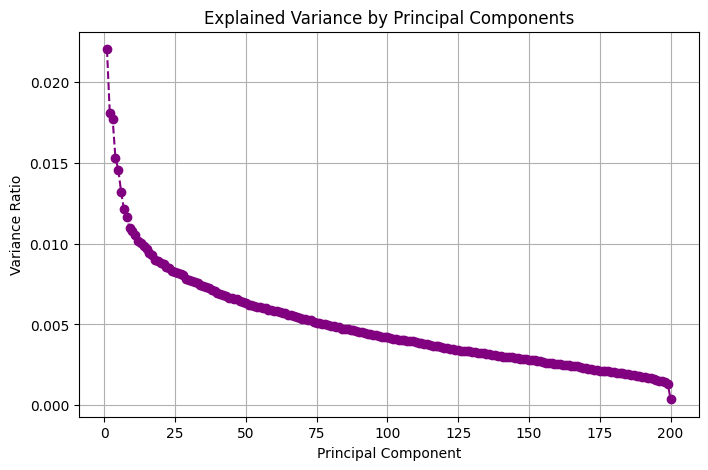

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get vectors using DataFrame index
doc_vectors = [model.dv[str(i)] for i in df.index]

# Fit PCA
pca = PCA()
pca.fit(doc_vectors)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_,
         marker='o', linestyle='--', color='purple')

plt.title("Explained Variance by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.grid(True)
plt.show()


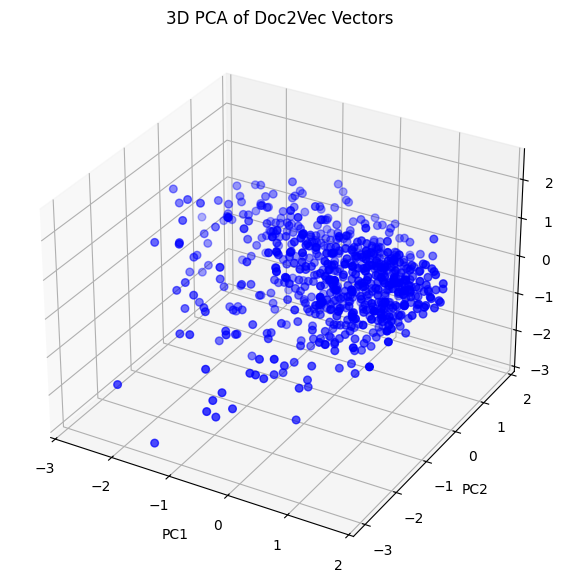

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Get vectors using DataFrame index
doc_vectors = [model.dv[str(i)] for i in df.index]

# PCA for 3D
pca = PCA(n_components=3)
reduced = pca.fit_transform(doc_vectors)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced[:, 0], reduced[:, 1], reduced[:, 2], color='blue', s=30)

ax.set_title("3D PCA of Doc2Vec Vectors")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()


In [38]:
import numpy as np
from scipy.spatial.distance import euclidean

# Infer vector for a document
tokens = df['tokens'].iloc[210]
inferred_vector = model.infer_vector(tokens)

# Compute Euclidean distance to all document vectors
distances = []
for i in range(len(df)):
    vec = model.dv[str(i)]
    dist = euclidean(inferred_vector, vec)
    distances.append((i, dist))

# Get top 5 closest (smallest distance)
closest_docs = sorted(distances, key=lambda x: x[1])[:10]

# Print results
print("Top 5 most similar documents (Euclidean):")
for doc_id, dist in closest_docs:
    print(f"Doc ID: {doc_id}, Distance: {dist:.4f}")
    print("Text:", df.loc[doc_id, 'Session_Summary'])
    print("---")


Top 5 most similar documents (Euclidean):
Doc ID: 210, Distance: 2.7102
Text: we started with an explanation of population and sample. a sample should be a good representative of the population. we train our model on the sample and predict or interpret for the whole population. we have to predict the parameters of the population using the sample's statistics. these statistics include count, mean, mode, standard error, median, standard deviation, and variance.

in y = f(x), y is the dependent variable, and x is the independent variable. for simple linear regression, the form of the equation is y = b0 + b1x, where our job is to predict b0 and b1 to best fit our data. for different samples, the values of b0 and b1 may vary, which is why we introduce confidence intervals.

point estimates give a single value for a population parameter but may not be accurate due to variation in samples. interval estimates provide a range where the true population value is likely to be, with a certain level

In [41]:
import random
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from scipy.spatial.distance import euclidean, cosine
import numpy as np
import matplotlib.pyplot as plt

# Set vector sizes
vector_sizes = list(range(100, 1100, 50))
avg_euclidean_distances = []
avg_cosine_similarities = []

# Pick 40 random doc indices (same for all vector sizes)
random.seed(42)
sample_indices = random.sample(list(df.index), 40)

for vec_size in vector_sizes:
    # Train Doc2Vec
    tagged_data = [TaggedDocument(words=tokens, tags=[str(i)]) for i, tokens in zip(df.index, df['tokens'])]
    model = Doc2Vec(tagged_data, vector_size=vec_size, window=5, min_count=1, workers=4, dm=0, epochs=1000)

    top5_euclidean = []
    top5_cosine = []

    for idx in sample_indices:
        inferred_vector = model.infer_vector(df.loc[idx, 'tokens'])

        distances = []
        similarities = []

        for i in df.index:
            if i == idx:
                continue
            vec = model.dv[str(i)]
            distances.append((i, euclidean(inferred_vector, vec)))
            similarities.append((i, 1 - cosine(inferred_vector, vec)))  # Cosine similarity = 1 - cosine distance

        # Get top 5 for both metrics
        top5_dist_vals = sorted(distances, key=lambda x: x[1])[:5]
        top5_sim_vals = sorted(similarities, key=lambda x: -x[1])[:5]

        avg_top5_euc = sum([val for _, val in top5_dist_vals]) / 5
        avg_top5_cos = sum([val for _, val in top5_sim_vals]) / 5

        top5_euclidean.append(avg_top5_euc)
        top5_cosine.append(avg_top5_cos)

    avg_euclidean_distances.append(sum(top5_euclidean) / len(top5_euclidean))
    avg_cosine_similarities.append(sum(top5_cosine) / len(top5_cosine))


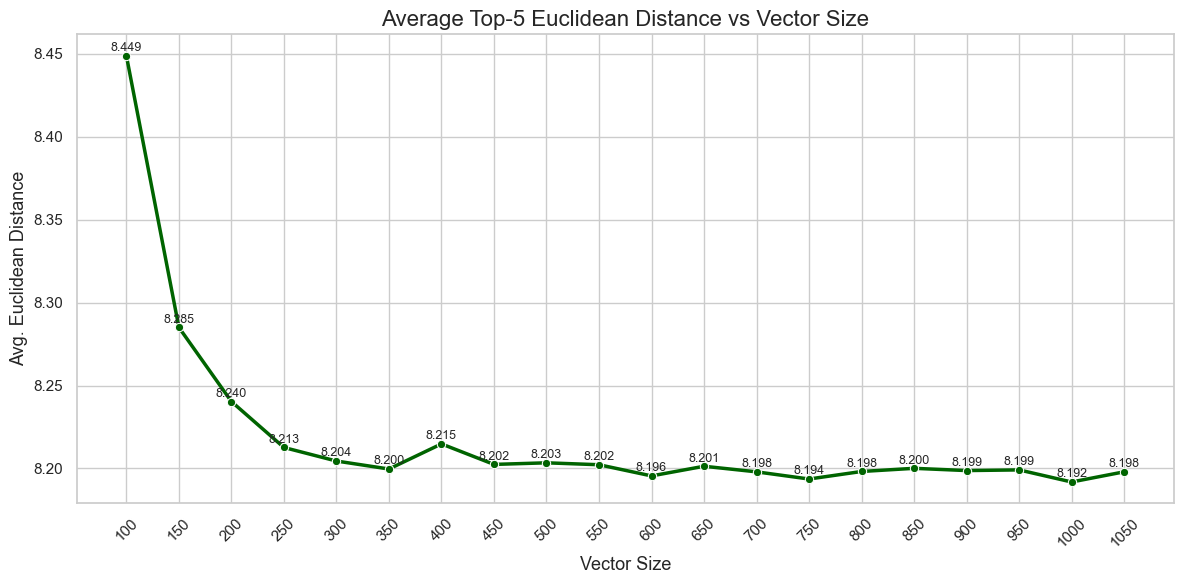

In [42]:
import seaborn as sns

sns.set_theme(style="whitegrid")

# First plot: Euclidean Distance
plt.figure(figsize=(12, 6))
sns.lineplot(x=vector_sizes, y=avg_euclidean_distances, marker='o', color='darkgreen', linewidth=2.5)
for x, y in zip(vector_sizes, avg_euclidean_distances):
    plt.text(x, y + 0.001, f"{y:.3f}", ha='center', va='bottom', fontsize=9)
plt.title("Average Top-5 Euclidean Distance vs Vector Size", fontsize=16)
plt.xlabel("Vector Size", fontsize=13)
plt.ylabel("Avg. Euclidean Distance", fontsize=13)
plt.xticks(vector_sizes, rotation=45)
plt.tight_layout()
plt.show()

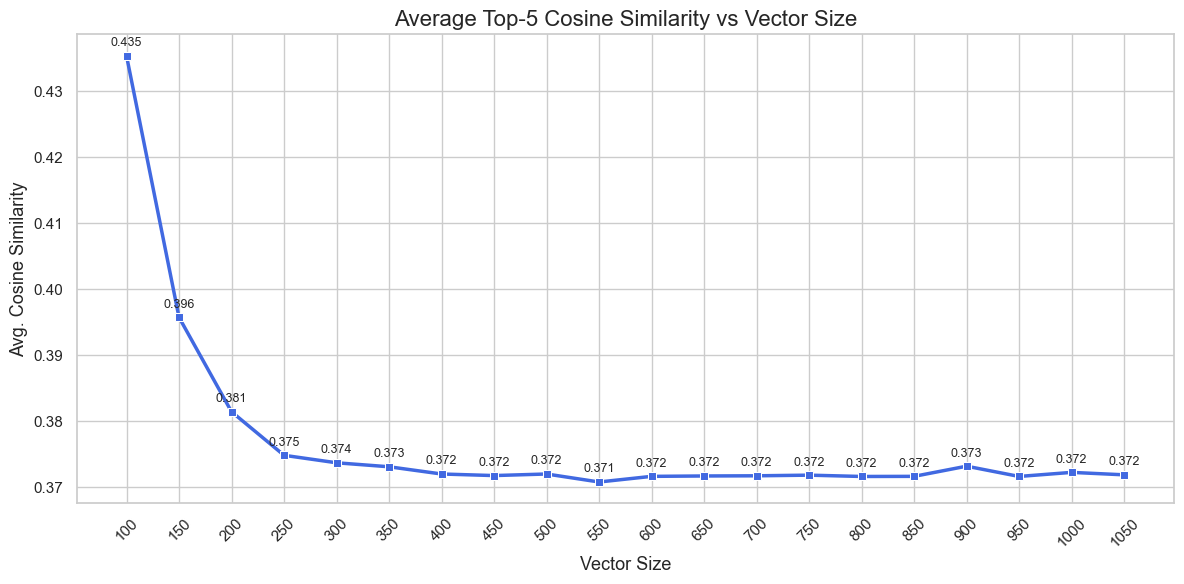

In [43]:
# Second plot: Cosine Similarity
plt.figure(figsize=(12, 6))
sns.lineplot(x=vector_sizes, y=avg_cosine_similarities, marker='s', color='royalblue', linewidth=2.5)
for x, y in zip(vector_sizes, avg_cosine_similarities):
    plt.text(x, y + 0.001, f"{y:.3f}", ha='center', va='bottom', fontsize=9)
plt.title("Average Top-5 Cosine Similarity vs Vector Size", fontsize=16)
plt.xlabel("Vector Size", fontsize=13)
plt.ylabel("Avg. Cosine Similarity", fontsize=13)
plt.xticks(vector_sizes, rotation=45)
plt.tight_layout()
plt.show()

In [44]:
# # Save the model
# model.save("doc2vec_model.model")